# COVID-19 Italia

https://github.com/pcm-dpc/COVID-19

http://opendatadpc.maps.arcgis.com/apps/opsdashboard/index.html#/b0c68bce2cce478eaac82fe38d4138b1

In [1]:
import sys
#sys.path.append('/usr/local/lib/python3.7/site-packages')
#sys.path

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from math import log, e
from datetime import datetime
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MultipleLocator

In [2]:
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv'
dati = pd.read_csv(url, parse_dates=['data'], index_col=0)

In [3]:
print( '\n\n*** columns ***\n', dati.columns )
print( '\n\n*** index   ***\n', dati[dati['sigla_provincia'] == 'RM'].index )
print( '\n\n*** head()  ***\n', dati.head() )
print( '\n\n*** tail()  ***\n', dati.tail() )



*** columns ***
 Index(['stato', 'codice_regione', 'denominazione_regione', 'codice_provincia',
       'denominazione_provincia', 'sigla_provincia', 'lat', 'long',
       'totale_casi'],
      dtype='object')


*** index   ***
 DatetimeIndex(['2020-02-24 18:00:00', '2020-02-25 18:00:00',
               '2020-02-26 18:00:00', '2020-02-27 18:00:00',
               '2020-02-28 18:00:00', '2020-02-29 17:00:00',
               '2020-03-01 17:00:00', '2020-03-02 17:00:00',
               '2020-03-03 17:00:00', '2020-03-04 17:00:00',
               '2020-03-05 17:00:00', '2020-03-06 18:00:00',
               '2020-03-07 18:00:00', '2020-03-08 18:00:00',
               '2020-03-09 18:00:00', '2020-03-10 18:00:00',
               '2020-03-11 17:00:00', '2020-03-12 17:00:00',
               '2020-03-13 17:00:00', '2020-03-14 17:00:00',
               '2020-03-15 17:00:00', '2020-03-16 17:00:00',
               '2020-03-17 17:00:00', '2020-03-18 17:00:00'],
              dtype='datetime64[ns]',

In [4]:
dati[dati['sigla_provincia'] == 'TV']['totale_casi']

data
2020-02-24 18:00:00      0
2020-02-25 18:00:00      1
2020-02-26 18:00:00      2
2020-02-27 18:00:00     22
2020-02-28 18:00:00     23
2020-02-29 17:00:00     35
2020-03-01 17:00:00     43
2020-03-02 17:00:00     72
2020-03-03 17:00:00     82
2020-03-04 17:00:00     86
2020-03-05 17:00:00     89
2020-03-06 18:00:00    103
2020-03-07 18:00:00    110
2020-03-08 18:00:00    126
2020-03-09 18:00:00    136
2020-03-10 18:00:00    158
2020-03-11 17:00:00    185
2020-03-12 17:00:00    279
2020-03-13 17:00:00    327
2020-03-14 17:00:00    376
2020-03-15 17:00:00    413
2020-03-16 17:00:00    452
2020-03-17 17:00:00    502
2020-03-18 17:00:00    591
Name: totale_casi, dtype: int64

In [5]:
dati[dati['sigla_provincia'] == 'RM']['totale_casi']
#a[1:].to_numpy() - a[:-1].to_numpy()

data
2020-02-24 18:00:00      0
2020-02-25 18:00:00      3
2020-02-26 18:00:00      3
2020-02-27 18:00:00      3
2020-02-28 18:00:00      3
2020-02-29 17:00:00      6
2020-03-01 17:00:00      6
2020-03-02 17:00:00      7
2020-03-03 17:00:00     14
2020-03-04 17:00:00     29
2020-03-05 17:00:00     42
2020-03-06 18:00:00     49
2020-03-07 18:00:00     71
2020-03-08 18:00:00     77
2020-03-09 18:00:00     91
2020-03-10 18:00:00     76
2020-03-11 17:00:00     99
2020-03-12 17:00:00    162
2020-03-13 17:00:00    218
2020-03-14 17:00:00    288
2020-03-15 17:00:00    354
2020-03-16 17:00:00    412
2020-03-17 17:00:00    486
2020-03-18 17:00:00    590
Name: totale_casi, dtype: int64

In [6]:
dati[dati['denominazione_provincia'] == 'Lodi']['totale_casi']

data
2020-02-24 18:00:00       0
2020-02-25 18:00:00     125
2020-02-26 18:00:00     128
2020-02-27 18:00:00     159
2020-02-28 18:00:00     182
2020-02-29 17:00:00     237
2020-03-01 17:00:00     344
2020-03-02 17:00:00     384
2020-03-03 17:00:00     482
2020-03-04 17:00:00     559
2020-03-05 17:00:00     658
2020-03-06 18:00:00     739
2020-03-07 18:00:00     811
2020-03-08 18:00:00     853
2020-03-09 18:00:00     928
2020-03-10 18:00:00     963
2020-03-11 17:00:00    1035
2020-03-12 17:00:00    1123
2020-03-13 17:00:00    1133
2020-03-14 17:00:00    1276
2020-03-15 17:00:00    1320
2020-03-16 17:00:00    1362
2020-03-17 17:00:00    1418
2020-03-18 17:00:00    1445
Name: totale_casi, dtype: int64

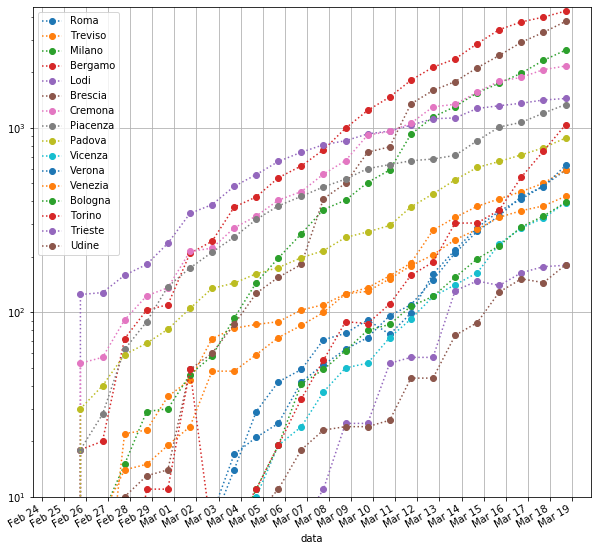

In [7]:
%matplotlib inline
#%matplotlib 
plt.rcParams['figure.figsize'] = [10, 10]


plt.close('all')
fig, ax = plt.subplots()
lista = ['Roma', 'Treviso']
lista += [ 'Milano', 'Bergamo', 'Lodi', 'Brescia', 'Cremona', 'Piacenza']
lista += [ 'Padova', 'Vicenza', 'Verona', 'Venezia' ]
lista.append('Bologna')
lista.append('Torino')
lista.append('Trieste')
lista.append('Udine')
for name in lista:
    ax = dati[dati['denominazione_provincia'] == name]['totale_casi'].plot(marker='o',
                                                                           linestyle=':',
                                                                           label=name)
ax.legend()
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_yticks([10, 20, 40, 60, 80, 100, 120, 500])
ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())


plt.ylim(bottom=10)
plt.yscale('log')
plt.grid()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


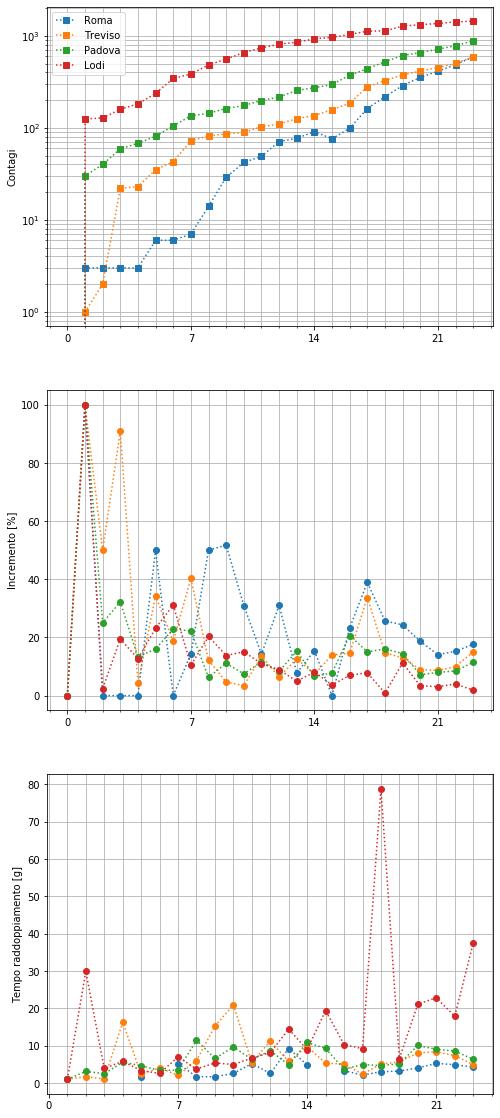

In [8]:
%matplotlib inline
#%matplotlib 
plt.rcParams['figure.figsize'] = [8, 20]

# ln(2)/(d ln N/dt)

plt.close('all')
fig, ax = plt.subplots(3,1)
lista = ['Roma', 'Treviso']
#lista += [ 'Milano', 'Bergamo', 'Lodi', 'Brescia', 'Cremona', 'Piacenza']
#lista += [ 'Padova', 'Vicenza', 'Verona', 'Venezia' ]
#lista.append('Bologna')
#lista.append('Torino')
#lista.append('Trieste')
#lista.append('Udine')
lista.append('Padova')
lista.append('Lodi')
for name in lista:
    c = dati[dati['denominazione_provincia'] == name]['totale_casi'].to_numpy()
    x = np.arange(len(c))
    ax[0].plot(x,c,marker='s',linestyle=':',label=name)
    #y = np.log( c ); y[0] = 0 ; y[1:] = y[1:] - y[:-1] ; y = [ (log(2) / yy if yy>0 else float('nan')) for yy in y ]
    y = np.zeros( len(x) )
    y[1:] = ( c[1:] - c[:-1] ) / c[1:]
    #y =  y.clip(min=0)  
    y[ y<0 ] = 0.0
    ax[1].plot(x,100*y,marker='o',linestyle=':',label=name)
    yd = np.log( 1 + y )
    yd = log(2) / yd
    ax[2].plot(x,yd,marker='o',linestyle=':',label=name)    
ax[0].legend()
ax[0].set_ylabel('Contagi')
ax[0].set_yscale('log')
ax[1].set_ylabel('Incremento [%]')
ax[2].set_ylabel('Tempo raddoppiamento [g]')


#start = 0; step = 7
#xticks = dati[dati['sigla_provincia'] == 'RM'].index
#fxticks = [ datetime.strptime(date, '%m/%d/%y').strftime('%b %d') for date in list(xticks) ]
#plt.xticks(x[start::step], xticks[start::step])

start = 0; step = 7
#plt.xticks(x[start::step], x[start::step])
for i in range(3):
    ax[i].set_xticks(x[start::step])
    ax[i].xaxis.set_minor_locator(MultipleLocator())
    ax[i].grid(True, 'both')

#plt.ylim(bottom=0, top=100)
#plt.yscale('linear')
#plt.grid()

Treviso
Padova
Lodi
Milano
Bergamo
Brescia


Text(0.5, 1.0, 'COVID-19 in some Italian provinces')

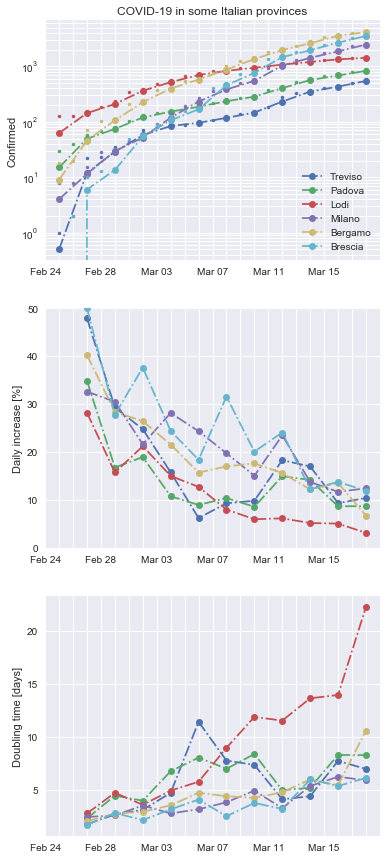

In [11]:
%matplotlib inline
#%matplotlib 
#plt.rcParams['figure.figsize'] = [8, 20]


start = 0; step = 2
lista = ['Treviso']
#lista = ['Roma', 'Treviso']
lista.append('Padova')
#lista.append('Napoli')
#lista += [ 'Milano', 'Bergamo', 'Lodi', 'Brescia', 'Cremona', 'Piacenza']
#lista += [ 'Padova', 'Vicenza', 'Verona', 'Venezia' ]
#lista.append('Bologna')
#lista.append('Torino')
#lista.append('Trieste')
#lista.append('Udine')
lista.append('Lodi')
lista.append('Milano')
lista.append('Bergamo')
lista.append('Brescia')

plt.close('all')
mpl.style.use('seaborn')
fig, ax = plt.subplots( 3, 1, figsize=(6, 15))

for n, name in enumerate(lista):
    print(name)
    cn='C{}'.format(n)
    
    ct = dati[dati['denominazione_provincia'] == name]['totale_casi'].to_numpy()
    xt = np.arange(len(ct))
    ax[0].plot(xt,ct,marker='.',linestyle='',label='', color=cn) 
    
    c = ct[start+step-1::step]
    c2 = c**2
    for i in range(step-1):
        dc = ct[start+step-i-2::step][0:len(c)]
        c += dc
        c2 += dc**2
    c = c / step
    c2 = c2 / step
    cerr = ( c2 - c**2 )**0.5
    x = step * np.arange(len(c)) + step/2
    ax[0].set_ylabel('Confirmed')
    ax[0].set_yscale('log')
    ax[0].plot(x,c,marker='o',linestyle='-.',label=name, color=cn)
    #ax[0].errorbar(x,c,cerr,marker='s',linestyle=':',label=name)
    ax[0].legend()
    
    y = np.zeros( len(x) )
    y[1:] = ( c[1:] - c[:-1] ) / (step * c[1:])
    #y =  y.clip(min=0)  
    y[ y<0 ] = 0.0
    ax[1].plot( x[1:], 100*y[1:], marker='o',linestyle='-.',label=name)
    #ax[1].errorbar( x, 100*y, yerr=cerr/c, marker='o',linestyle=':',label=name)
    ax[1].set_ylabel('Daily increase [%]')
    ax[1].set_ylim(0)

    yd = np.log( 1 + y )
    yd[ yd>0 ] = log(2) / yd[ yd>0 ] 
    yd[ yd<=0 ] = float('nan') 
    ax[2].plot(x[1:],yd[1:],marker='o',linestyle='-.',label=name)    
    #ax[2].set_yscale('log')
    ax[2].set_ylabel('Doubling time [days]')
    #ax[2].set_xlabel('Giorni dal 24 Feb.')
    
    #y = np.log( c ); y[0] = 0 ; y[1:] = y[1:] - y[:-1] ; y = [ (log(2) / yy if yy>0 else float('nan')) for yy in y ]


index = dati[dati['sigla_provincia'] == 'RM'].index
rindex = range(len(index))
xticks = rindex
#print(xticks)
fxticks = [ date.strftime('%b %d') for date in list( index ) ]
#print(fxticks)
#plt.xticks(x[start::step], xticks[start::step])

#plt.xticks(x[start::step], x[start::step])
step=4
for i in range(3):
    ax[i].set_xlim( 0, xt.max()+1)
    ax[i].set_xticks(xticks[::step])
    ax[i].set_xticklabels(fxticks[::step])
    #ax[i].set_xticklabels([])
    ax[i].set_xticks(xticks, minor=True)
    ax[i].grid(True, 'both')

ax[0].set_title('COVID-19 in some Italian provinces')
#ax[-1].set_xticklabels(fxticks)

#plt.ylim(bottom=0, top=100)
#plt.yscale('linear')
#plt.grid()

In [73]:
np.clip?